In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'white')
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics, decomposition, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc, log_loss
from sklearn.preprocessing import StandardScaler
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
cancer_data = pd.read_csv('data.csv')
df = cancer_data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop('Unnamed: 32', axis = 1, inplace = True )
df.drop('id', axis = 1, inplace = True )
df.rename(columns = {'diagnosis' : 'target'}, inplace = True)
df

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Amount of diagnosis

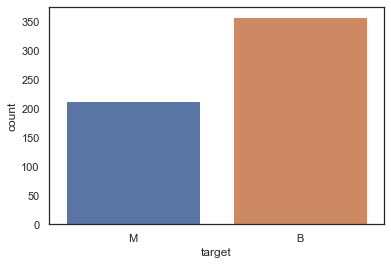

In [9]:
sns.countplot(df['target'], label = "count");

In [10]:
df['target'].replace(to_replace='M', value=1, inplace=True)
df['target'].replace(to_replace='B', value=0, inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


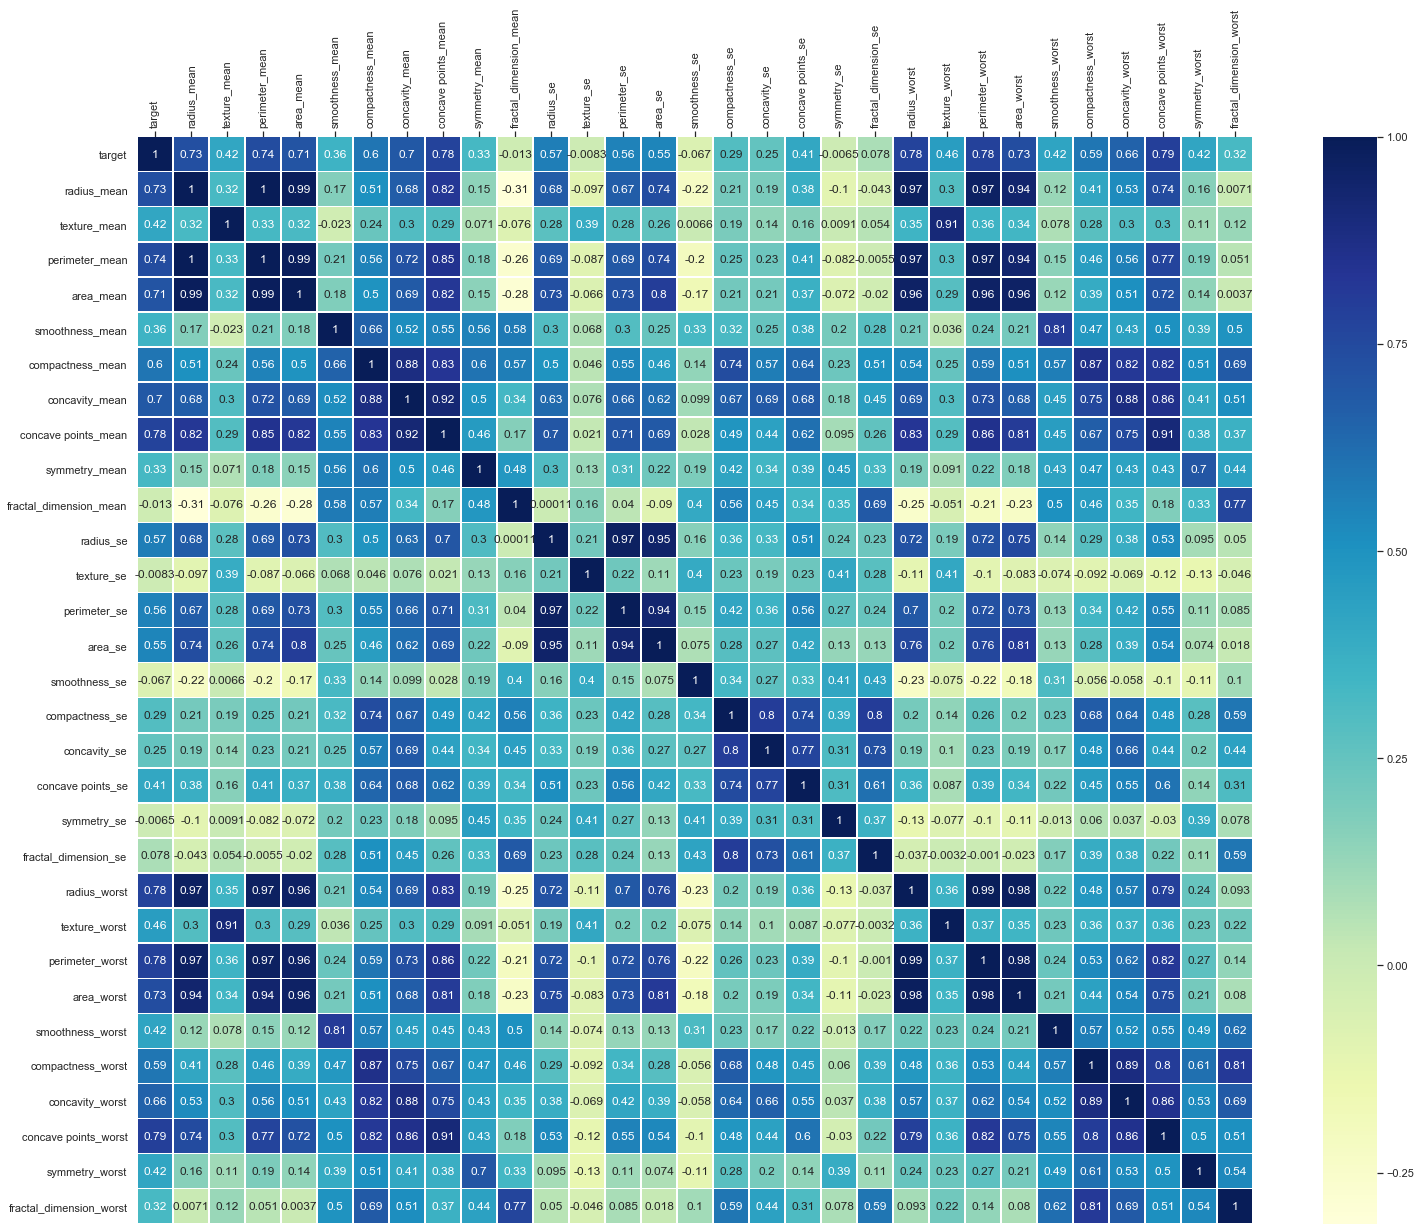

In [11]:
plt.subplots(figsize =(25,20))
heat_map = sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', linewidths = .5) #cmap is color of our heatmap i love blue so i use YlGnBu. you can make with other colors tho.
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)
heat_map.xaxis.set_ticks_position('top')

In [12]:
df.select_dtypes('number').columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

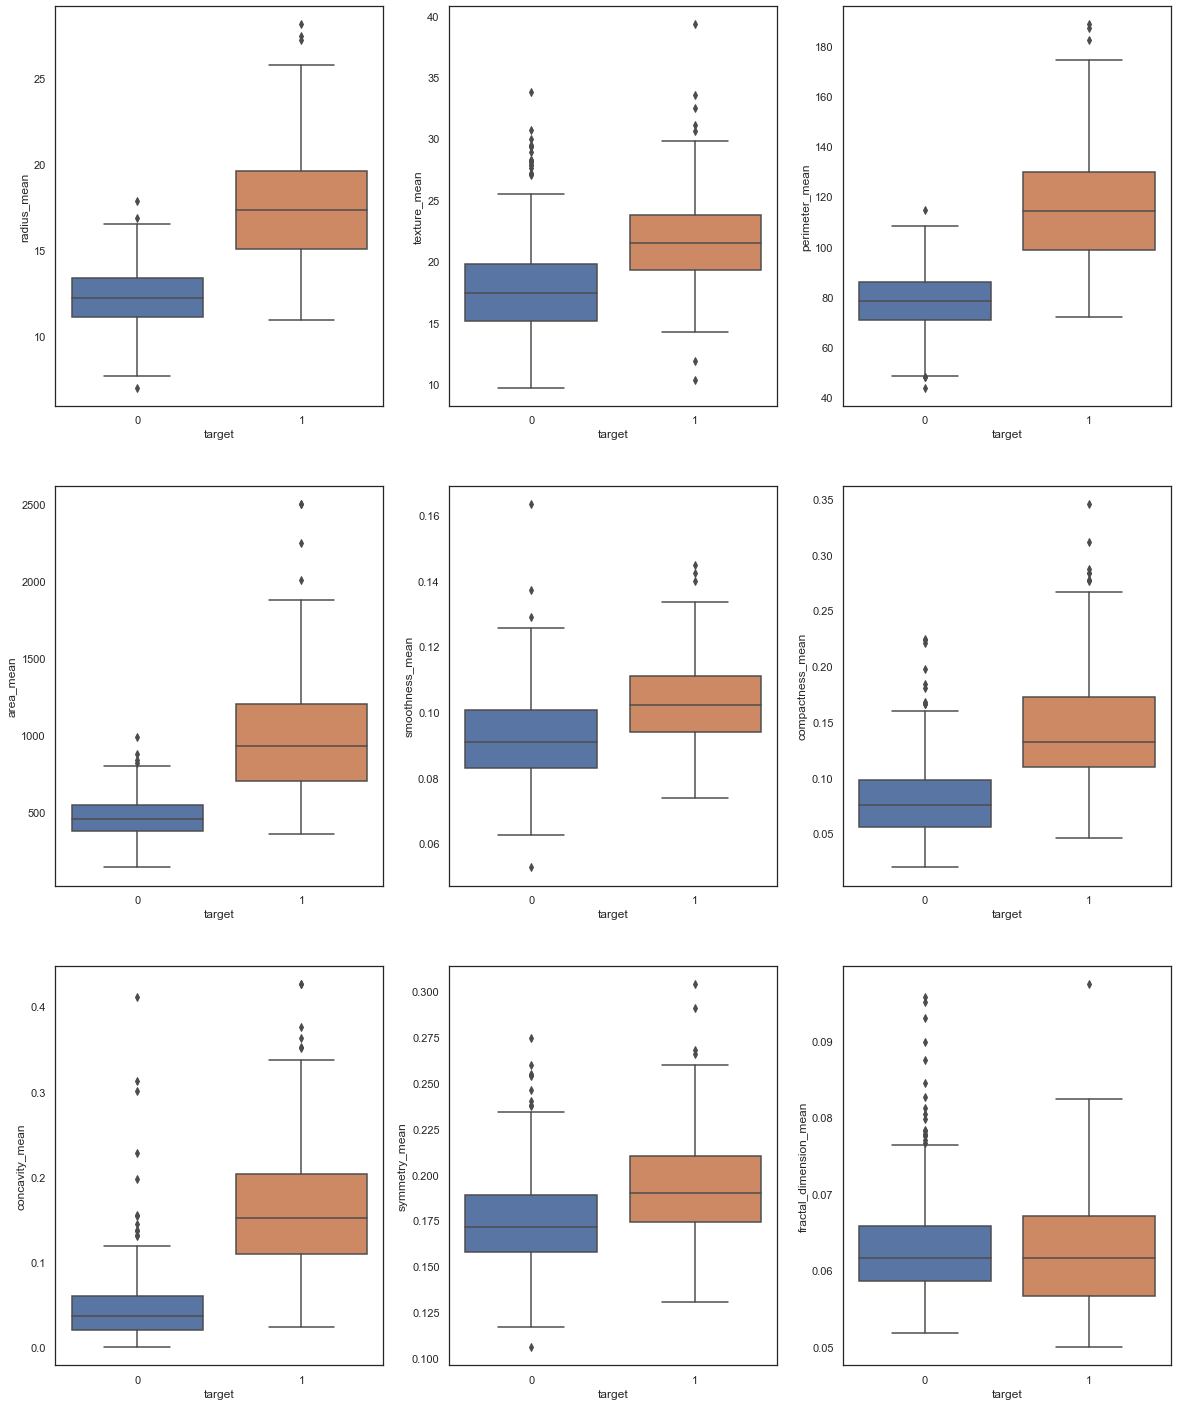

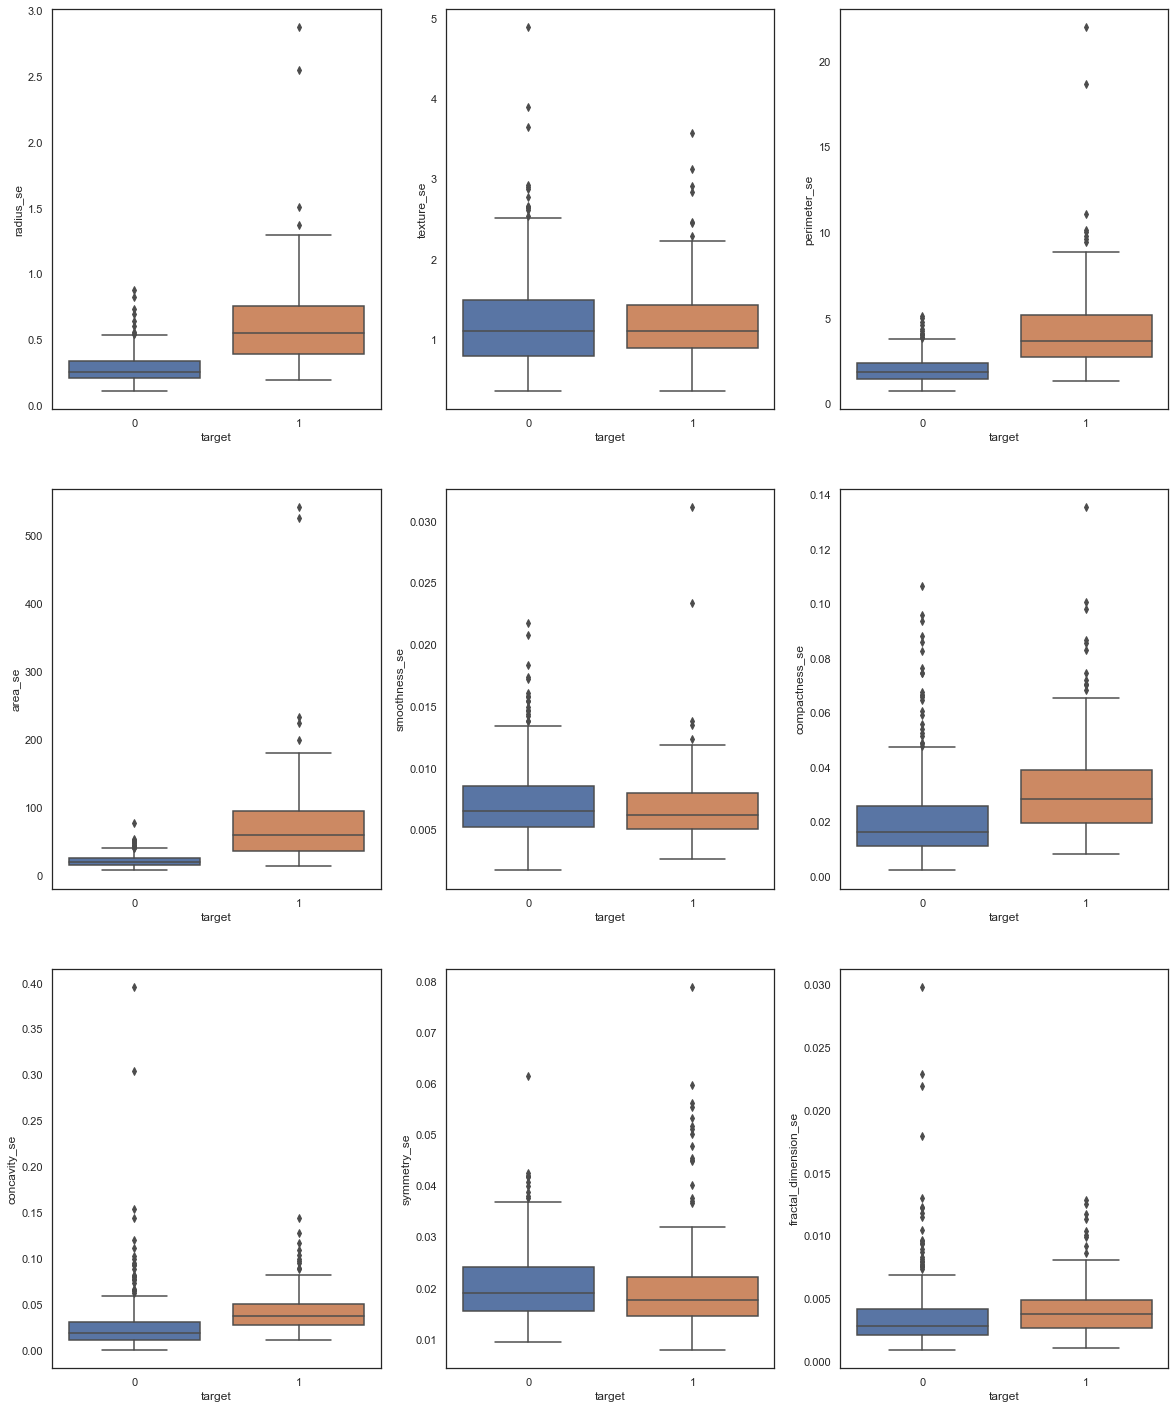

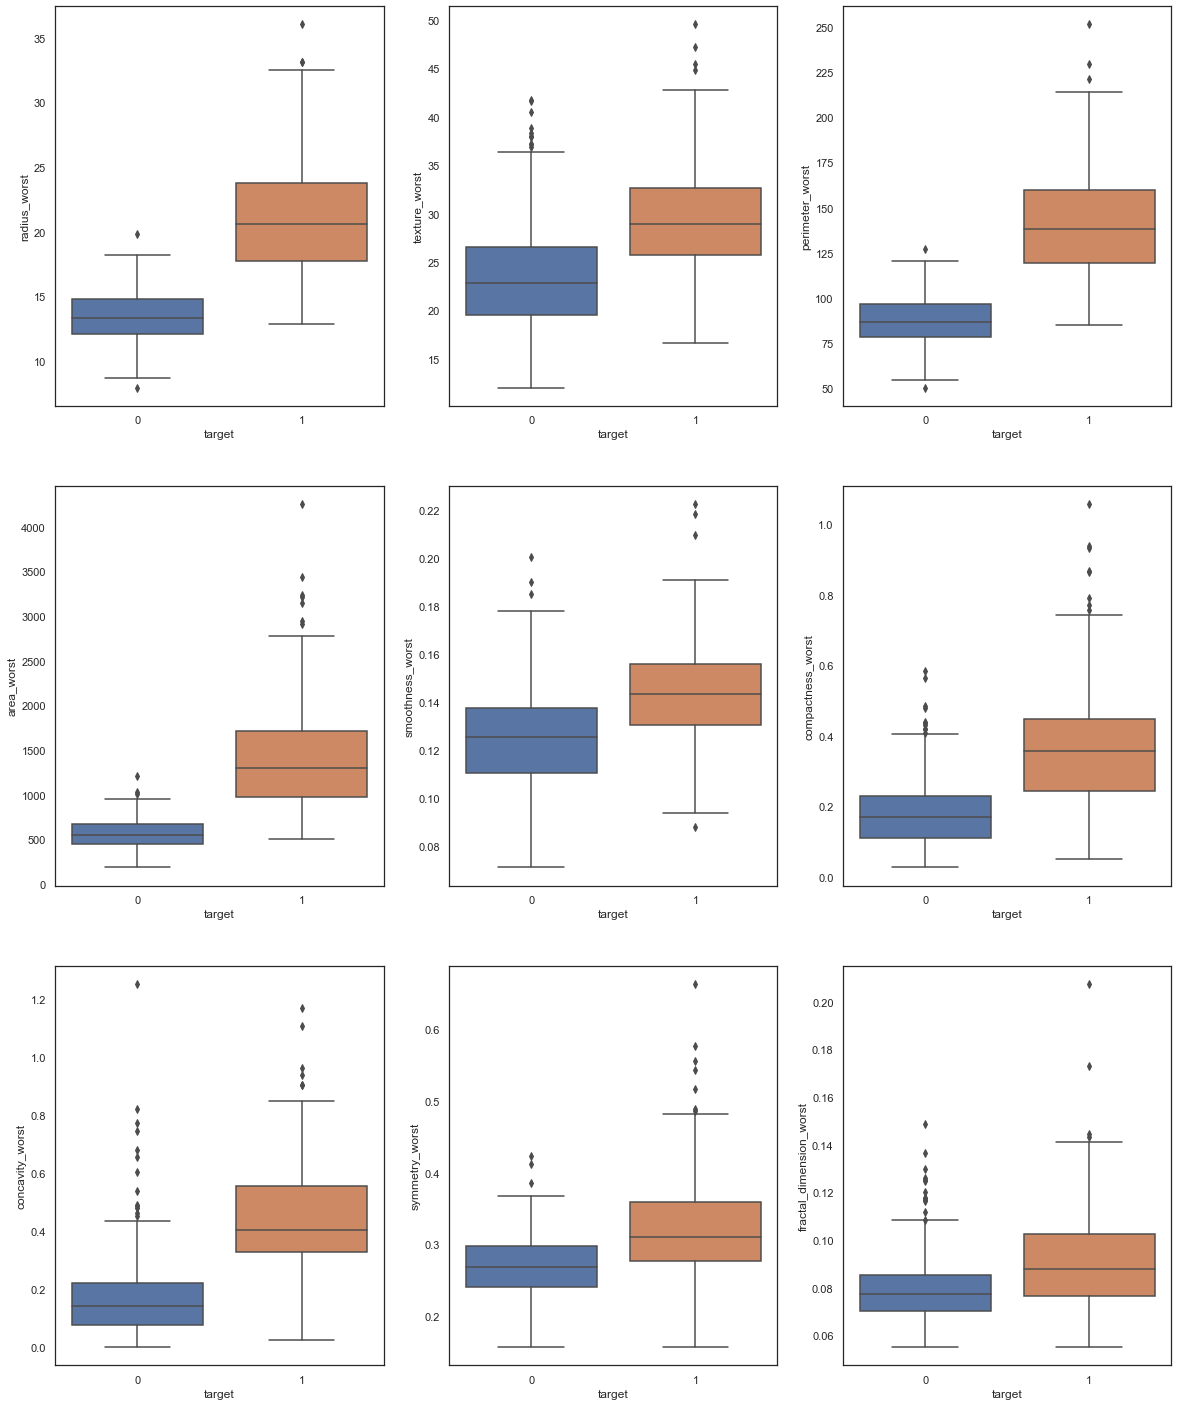

In [13]:
def making_boxplot():
    num_list = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

    f,((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
    ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
    for i in range(len(num_list)):
        box1_plot = sns.boxplot(x= 'target', y = num_list[i], data= df, ax=ax[i])
        fig = box1_plot.get_figure()
        fig.savefig("1.png")
    
    num_list2 = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
             'symmetry_se', 'fractal_dimension_se']

    f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
    ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

    for i in range(len(num_list2)):
        box2_plot = sns.boxplot(x = 'target', y = num_list2[i], data=df, ax=ax[i])
        fig = box2_plot.get_figure()
        fig.savefig("2.png")
    
    
    num_list3 =['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
            'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

    f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
    ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

    for i in range(len(num_list3)):
        box3_plot = sns.boxplot(x = 'target', y = num_list3[i], data=df, ax=ax[i])
        fig = box3_plot.get_figure()
        fig.savefig("3.png")
making_boxplot()

### Outlier Detection

In [14]:
def detection(data, n, features):
    
    indices = []
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        step = 1.5 * IQR
        list_of_col = df[(df[column] < Q1 - step) | (df[column] > Q3 + step)].index
        indices.extend(list_of_col)
    indices = Counter(indices)
    outliers = list(a for a, b in indices.items() if b > n)
    return outliers
attributes = df.drop('target', axis = 1).columns
outliers_will_drop = detection(df, 2, attributes)

In [15]:
df.loc[outliers_will_drop]

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,1,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,1,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,1,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,1,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,1,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,0,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,0,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,1,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [16]:
df.drop(outliers_will_drop, axis = 0, inplace = True)

In [17]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

Index(['texture_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_se', 'area_worst', 'concavity_worst',
       'fractal_dimension_worst'],
      dtype='object')
0.9706295886297414


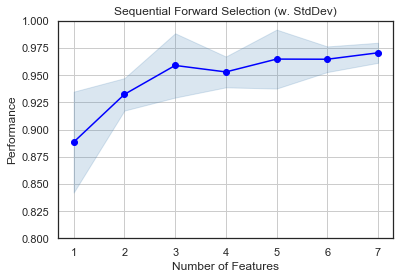

In [18]:
sfs = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=7, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=5)
sfs.fit(X_train, y_train)
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)
print(sfs.k_score_)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig("numberoffeatures")
plt.show()

In [19]:
models = []
grid_scores = []
test_scores = []

# LOGISTIC REGRESSION

In [20]:
def Logistic_Regression_Model():

    log_model = LogisticRegression(random_state = 42)
    #Train-test Evaluation
    print('Train/Test split results:')
    log_traintest = log_model.fit(X_train_sfs,y_train)
    traintest_pred = log_traintest.predict(X_test_sfs)
    traintest_pred_proba = log_traintest.predict_proba(X_test_sfs)[:,1]
    [tt_fpr, tt_tpr, tt_thr] = roc_curve(y_test, traintest_pred_proba)
    print(log_traintest.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, traintest_pred))
    test_scores.append(accuracy_score(y_test, traintest_pred))
    #Pipeline for GridSearchCV
    n_components = list(range(1,X_train_sfs.shape[1]+1,1))
    C = np.logspace(-4,4,4)
    penalty = ['l1', "l2"]
    params = {
    'pca__n_components': n_components,
    'clf__C':C,
    "clf__penalty": penalty}
    pca = decomposition.PCA()
    pipe = Pipeline(steps = [("pca" , pca),
                             ("clf" , log_model)])
    clf = GridSearchCV(estimator= pipe,cv = 5, param_grid = params,scoring = "accuracy",n_jobs = -1, verbose=0)
    clf = clf.fit(X_train_sfs, y_train)
    results = clf.cv_results_
    y_pred = clf.predict(X_test_sfs)
    y_pred_proba = clf.predict_proba(X_test_sfs)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    print('\nGridSearchCV split results:')
    print(clf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
    print(clf.__class__.__name__+" auc is %2.6f" % auc(fpr, tpr))
    print("Best parameters (CV score=%0.7f):" % clf.best_score_)
    print(clf.best_params_) 
Logistic_Regression_Model()

Train/Test split results:
LogisticRegression accuracy is 0.938

GridSearchCV split results:
GridSearchCV accuracy is 0.966
GridSearchCV log_loss is 0.110
GridSearchCV auc is 0.988854
Best parameters (CV score=0.9705882):
{'clf__C': 10000.0, 'clf__penalty': 'l1', 'pca__n_components': 6}


In [21]:
def Best_Logistic_Regression_Model():
    param_grid = {
    'pca__n_components': [6],
    'clf__C': [10000.0],
    "clf__penalty": ["l1"]}
    pca = decomposition.PCA()
    log_model = LogisticRegression()
    pipe = Pipeline(steps = [("pca" , pca),
                             ("clf" , log_model)])
    best_log = GridSearchCV(estimator= pipe,cv = 5, param_grid = param_grid, scoring = "accuracy",verbose =0, n_jobs =-1)
    best_log = best_log.fit(X_train_sfs, y_train)
    results = best_log.cv_results_
    y_pred = best_log.predict(X_test_sfs)
    y_pred_proba = best_log.predict_proba(X_test_sfs)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    print('GridSearchCV split results:')
    print(best_log.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred))
    print(best_log.__class__.__name__+" log_loss is %2.5f" % log_loss(y_test, y_pred_proba))
    print(best_log.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    models.append(('LR'))
    grid_scores.append(accuracy_score(y_test, y_pred))

Best_Logistic_Regression_Model()

GridSearchCV split results:
GridSearchCV accuracy is 0.96575
GridSearchCV log_loss is 0.11017
GridSearchCV auc is 0.989


# KNN

Accuracy Score Train/Test Split for k=4:  0.9178082191780822
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        95
           1       0.95      0.80      0.87        51

    accuracy                           0.92       146
   macro avg       0.93      0.89      0.91       146
weighted avg       0.92      0.92      0.92       146


GridSearchCV split results:
GridSearchCV accuracy is 0.93836
GridSearchCV log_loss is 0.60414
GridSearchCV auc is 0.965

Best neighborhood size(k) is =  29

Best weights size is =  distance

Best metric is =  manhattan
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.94      0.88      0.91        51

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.93       146
weighted avg       0.94      0.94      0.94       146



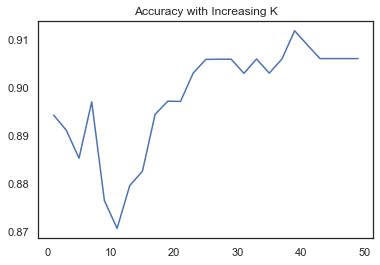

In [22]:
def knn_classifier():
    #/Train/Test Split
    knn_model = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
    knn_model = knn_model.fit(X_train_sfs, y_train)
    y_pred = knn_model.predict(X_test_sfs)
    print("Accuracy Score Train/Test Split for k=4: ", accuracy_score(y_test, y_pred))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    test_scores.append(accuracy_score(y_test, y_pred))
    knn = KNeighborsClassifier()
    params = {'knn__n_neighbors': np.arange(1,50,2),
                 "knn__weights" : ["uniform", "distance"],
                 "knn__metric": ['euclidean', 'manhattan']}
    pipe = Pipeline(steps = [("knn", knn)])
    clf = GridSearchCV(pipe,params, cv=5, n_jobs= -1, verbose = 0, scoring = "accuracy")
    clf = clf.fit(X_train_sfs, y_train)
    y_grid_pred = clf.predict(X_test_sfs)
    y_pred_proba = clf.predict_proba(X_test_sfs)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    idx = np.min(np.where(tpr > 0.95))
    print('\nGridSearchCV split results:')
    print(clf.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_grid_pred))
    print(clf.__class__.__name__+" log_loss is %2.5f" % log_loss(y_test, y_pred_proba))
    print(clf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    print("\nBest neighborhood size(k) is = ", clf.best_estimator_.get_params()['knn__n_neighbors'])
    print("\nBest weights size is = ", clf.best_estimator_.get_params()['knn__weights'])
    print("\nBest metric is = ", clf.best_estimator_.get_params()['knn__metric'])


    print("Classification Report: \n", classification_report(y_test, y_grid_pred))
    
    results = []

    for n in range(1, 50, 2):
        pipe = make_pipeline(KNeighborsClassifier(n_neighbors=n))
        c_val = cross_val_score(pipe, X_train_sfs, y_train, cv=5, scoring='accuracy').mean()
        results.append([n, c_val])
    results = pd.DataFrame(results, columns=["n", "accuracy"])

    
    plt.plot(results.n, results.accuracy)
    plt.savefig('knn.png')    
    plt.title("Accuracy with Increasing K")
    plt.show()
    
    
knn_classifier()

In [23]:
def Best_Knn_Model():
    knn = KNeighborsClassifier()
    grid_param = {"n_neighbors" : [29],
                 "weights" : ["distance"],
                 "metric" : ["manhattan"]}
    clf = GridSearchCV(knn, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 0)
    clf_result= clf.fit(X_train_sfs, y_train)
    y_pred = clf_result.predict(X_test_sfs)
    print("Classification Report: \n", classification_report(y_test, y_pred))

    print(metrics.accuracy_score(y_test, y_pred))
    models.append(('KNN'))
    grid_scores.append(accuracy_score(y_test, y_pred))

Best_Knn_Model()

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.94      0.88      0.91        51

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.93       146
weighted avg       0.94      0.94      0.94       146

0.9383561643835616


# Random Forest

Train/Test Split Score is: 
0.958904109589041
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.90      0.94        51

    accuracy                           0.96       146
   macro avg       0.96      0.95      0.95       146
weighted avg       0.96      0.96      0.96       146


GridSearchCV split results:
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.90      0.94        51

    accuracy                           0.96       146
   macro avg       0.96      0.95      0.95       146
weighted avg       0.96      0.96      0.96       146

GridSearchCV accuracy is 0.95890
GridSearchCV log_loss is 0.16323
GridSearchCV auc is 0.979

Best n estimator is =  50

Best max depth is =  5

Best min samples leaf is =  1

Best min split is =  5


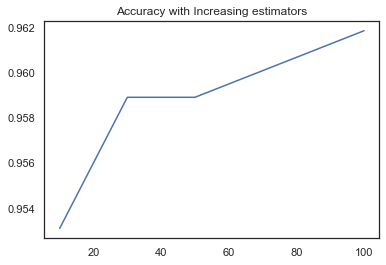

In [24]:
def random_forest():
    rf_model = RandomForestClassifier().fit(X_train_sfs, y_train)
    rf_model
    y_pred = rf_model.predict(X_test_sfs)
    print("Train/Test Split Score is: ")
    print(accuracy_score(y_test, y_pred))
    test_scores.append(accuracy_score(y_test, y_pred))

    print("Classification Report: \n", classification_report(y_test, y_pred))

    parameters = {'classifier__n_estimators': [10, 30, 50, 100],
                    'classifier__max_depth': [2, 5,8,10],
                    'classifier__min_samples_leaf': np.arange(1,5,1),
                    'classifier__min_samples_split': [2,5,10]} 
    classifier = RandomForestClassifier()
    pipe = Pipeline(steps=[("classifier", classifier)])
    clf = GridSearchCV(pipe, parameters, cv = 5, n_jobs= -1, verbose = 0)
    clf = clf.fit(X_train_sfs, y_train)
    y_grid_pred = clf.predict(X_test_sfs)
    y_pred_proba = clf.predict_proba(X_test_sfs)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    idx = np.min(np.where(tpr > 0.95))
    print('\nGridSearchCV split results:')
    print("Classification Report: \n", classification_report(y_test, y_grid_pred))

    print(clf.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_grid_pred))
    print(clf.__class__.__name__+" log_loss is %2.5f" % log_loss(y_test, y_pred_proba))
    print(clf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    print("\nBest n estimator is = ", clf.best_estimator_.get_params()['classifier__n_estimators'])
    print("\nBest max depth is = ", clf.best_estimator_.get_params()['classifier__max_depth'])
    print("\nBest min samples leaf is = ", clf.best_estimator_.get_params()['classifier__min_samples_leaf'])
    print("\nBest min split is = ", clf.best_estimator_.get_params()['classifier__min_samples_split'])
    
        
    estimators =  [10, 30, 50, 100]
    results = []
    for a in estimators:
        pipe = make_pipeline(RandomForestClassifier(n_estimators = a))
        c_val = cross_val_score(pipe, X_train_sfs, y_train, cv=5, scoring='accuracy').mean()
        results.append([a, c_val])
    results = pd.DataFrame(results, columns=["n", "accuracy"])

    plt.plot(results.n, results.accuracy)
    plt.savefig('forest.png')    
    plt.title("Accuracy with Increasing estimators")
    plt.show()

    
random_forest()

In [25]:
def Best_Random_Forest_Classifier():
    parameters = {'classifier__n_estimators': [50],
                    'classifier__max_depth': [5],
                    'classifier__min_samples_leaf': [1],
                    'classifier__min_samples_split': [5]}
    classifier= RandomForestClassifier()
    pipe = Pipeline(steps=[("classifier", classifier)])
    clf = GridSearchCV(pipe, parameters, cv = 5, n_jobs = -1, verbose =0)
    clf = clf.fit(X_train_sfs, y_train)
    y_pred = clf.predict(X_test_sfs)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print(metrics.accuracy_score(y_test, y_pred))
    models.append(('RFC'))
    grid_scores.append(accuracy_score(y_test, y_pred))
    
Best_Random_Forest_Classifier()

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.92      0.95        51

    accuracy                           0.97       146
   macro avg       0.97      0.96      0.96       146
weighted avg       0.97      0.97      0.97       146

0.9657534246575342


# Naive Bayes

In [26]:
def Naive_Bayes():
    #Train/Test Split
    naive = GaussianNB()
    naive = naive.fit(X_train_sfs, y_train)
    y_pred = naive.predict(X_test_sfs)
    print("Accuracy Score Train/Test Split: ", accuracy_score(y_test, y_pred))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    models.append(('NB'))
    grid_scores.append(accuracy_score(y_test, y_pred))
    test_scores.append(accuracy_score(y_test, y_pred))


    #GridSearch CV
    # GaussianNB does not accept any parameter: GaussianNB().get_params().keys() results in empty dict.
    # Only way to make this model better is to preprocess data.
    GaussianNB().get_params().keys()
Naive_Bayes()

Accuracy Score Train/Test Split:  0.9452054794520548
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.94      0.90      0.92        51

    accuracy                           0.95       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.95      0.95      0.94       146



# Model Comparison


In [27]:
models

['LR', 'KNN', 'RFC', 'NB']

In [28]:
test_scores

[0.9383561643835616, 0.9178082191780822, 0.958904109589041, 0.9452054794520548]

In [29]:
grid_scores

[0.9657534246575342,
 0.9383561643835616,
 0.9657534246575342,
 0.9452054794520548]

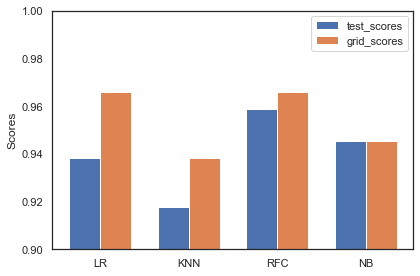

In [30]:
def comparing_of_models():
    fig, ax = plt.subplots()
    x = np.arange(len(models))  # the label locations
    width = 0.35
    rects1 = ax.bar(x - width/2, test_scores, width, label='test_scores')
    rects2 = ax.bar(x +  width/2, grid_scores, width, label='grid_scores')
    ax.set_ylabel('Scores')
    ax.set_xticks(x)
    ax.set_ylim(0.90,1)
    ax.set_xticklabels(models)
    ax.legend()
    fig.tight_layout()
    plt.savefig('comparison.png')    
    
    plt.show()
comparing_of_models()